# Data Pre-Processing

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error 
    

# Read the data from the CSV file
df = pd.read_excel("PMMA_Data_Set.xlsx")

df=df.drop(['No of Samples'], axis=1)
# Convert columns to the appropriate data type
for i in df.columns:
    df[i]=pd.to_numeric(df[i], errors='coerce')


In [2]:
df.describe()

,Initiator Concentration(CI),Temperature (T),Jacket Temperature (T),Coolant water flowrate (Fcw),Monomer inlet Flowrate (F),Coolant inlet temp.water (Two),Inlet temparature of Feed (Tin),Target variable (Monomer Concentration)
count,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.0,6000.000000,6000.000000
mean,0.025075,349.430084,331.626363,1.588000e-01,1.000060,293.2,350.000100,6.039932
std,0.000238,3.545478,3.322300,2.775789e-17,0.009995,0.0,0.079624,0.012250
min,0.024238,334.848325,320.642900,1.588000e-01,0.960181,293.2,349.654122,5.973775
25%,0.024913,347.062139,329.350333,1.588000e-01,0.993372,293.2,349.947217,6.031959
50%,0.025072,349.407225,331.659500,1.588000e-01,1.000116,293.2,349.998221,6.040533
75%,0.025237,351.820496,333.887454,1.588000e-01,1.006736,293.2,350.053336,6.048278
max,0.026032,363.452605,343.230499,1.588000e-01,1.034302,293.2,350.311722,6.081033


In [3]:
df.head()

,Initiator Concentration(CI),Temperature (T),Jacket Temperature (T),Coolant water flowrate (Fcw),Monomer inlet Flowrate (F),Coolant inlet temp.water (Two),Inlet temparature of Feed (Tin),Target variable (Monomer Concentration)
0,0.024431,346.867279,331.874633,0.1588,1.028782,293.2,350.014529,6.061848
1,0.025016,342.013221,334.982669,0.1588,1.003295,293.2,349.904450,6.054868
2,0.025366,344.491549,332.124375,0.1588,0.987497,293.2,350.088297,6.030551
3,0.025038,345.638794,326.586010,0.1588,1.000396,293.2,350.167016,6.021833
4,0.025017,344.759025,336.650641,0.1588,1.001877,293.2,349.933011,6.038306


In [4]:
df.drop(['Coolant water flowrate (Fcw)','Coolant inlet temp.water (Two)'], axis=1, inplace=True)

In [5]:
df.corr()

,Initiator Concentration(CI),Temperature (T),Jacket Temperature (T),Monomer inlet Flowrate (F),Inlet temparature of Feed (Tin),Target variable (Monomer Concentration)
Initiator Concentration(CI),1.000000,0.040229,0.014043,-0.995053,-0.052586,-0.701264
Temperature (T),0.040229,1.000000,0.000088,-0.042037,0.050690,-0.068554
Jacket Temperature (T),0.014043,0.000088,1.000000,-0.018843,0.044431,-0.046236
Monomer inlet Flowrate (F),-0.995053,-0.042037,-0.018843,1.000000,-0.003162,0.747685
Inlet temparature of Feed (Tin),-0.052586,0.050690,0.044431,-0.003162,1.000000,-0.523838
Target variable (Monomer Concentration),-0.701264,-0.068554,-0.046236,0.747685,-0.523838,1.000000


<Axes: >

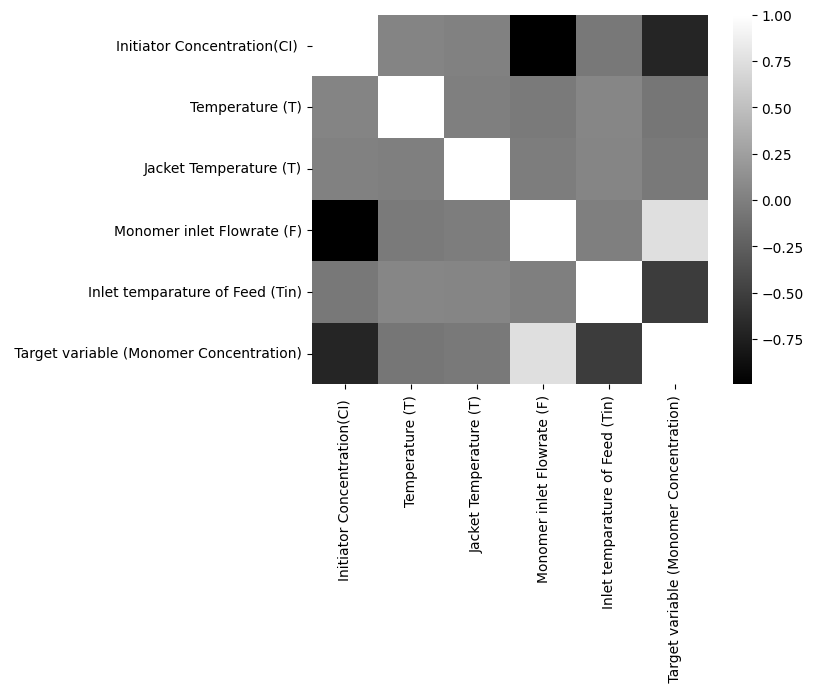

In [6]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='grey')

# Subset Selection & Linear Regression

## Process

In [7]:
# Get all possible subsets for subset selection
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

combinations=[list(i) for i in powerset({0,1,2,3,4})][1:]
print(combinations)

[[0], [1], [2], [3], [4], [0, 1], [0, 2], [0, 3], [0, 4], [1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4], [0, 1, 2], [0, 1, 3], [0, 1, 4], [0, 2, 3], [0, 2, 4], [0, 3, 4], [1, 2, 3], [1, 2, 4], [1, 3, 4], [2, 3, 4], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 2, 3, 4], [1, 2, 3, 4], [0, 1, 2, 3, 4]]


In [8]:
# Since number of possible subsets is small with less data, compute r2 score for each possible subset

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import pandas as pd
import math
results={}
for array in combinations:
    # Separate features and target variable
    features = df.iloc[:, array]  # All columns except the last
    target = df.iloc[:, -1]  # Last column
    
    # Define the linear regression model
    model = LinearRegression()
    
    # Test-Train-Validation Split (replace test_size with your desired split ratio)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
    
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Evaluate the model performance on the validation data (e.g., using mean squared error)
    predictions_val = model.predict(X_test)
    r2 = r2_score(y_test, predictions_val)
    print(array,"Validation r2 score:", r2)
    results[f'{array}']=round(r2,5)


[0] Validation r2 score: 0.48879238798081714
[1] Validation r2 score: 0.0063998270069711705
[2] Validation r2 score: 0.0012795209050674439
[3] Validation r2 score: 0.5579910051624988
[4] Validation r2 score: 0.2761635881058223
[0, 1] Validation r2 score: 0.49169378963368315
[0, 2] Validation r2 score: 0.4895798959491112
[0, 3] Validation r2 score: 0.7504897356892939
[0, 4] Validation r2 score: 0.7897664097343489
[1, 2] Validation r2 score: 0.008707528710344081
[1, 3] Validation r2 score: 0.5604424136887859
[1, 4] Validation r2 score: 0.2777469717088791
[2, 3] Validation r2 score: 0.558543209295747
[2, 4] Validation r2 score: 0.27704584816099453
[3, 4] Validation r2 score: 0.8170283632819957
[0, 1, 2] Validation r2 score: 0.49255572212854726
[0, 1, 3] Validation r2 score: 0.7518818403546645
[0, 1, 4] Validation r2 score: 0.78979734860324
[0, 2, 3] Validation r2 score: 0.7505045850508211
[0, 2, 4] Validation r2 score: 0.7899744031544201
[0, 3, 4] Validation r2 score: 0.8526821738848039
[

{3: 0.55799, 6: 0.81703, 9: 0.85268, 12: 0.85277, 15: 0.85281}
{0.55799: '[3]', 0.81703: '[3, 4]', 0.85268: '[0, 3, 4]', 0.85277: '[0, 1, 3, 4]', 0.85281: '[0, 1, 2, 3, 4]'}


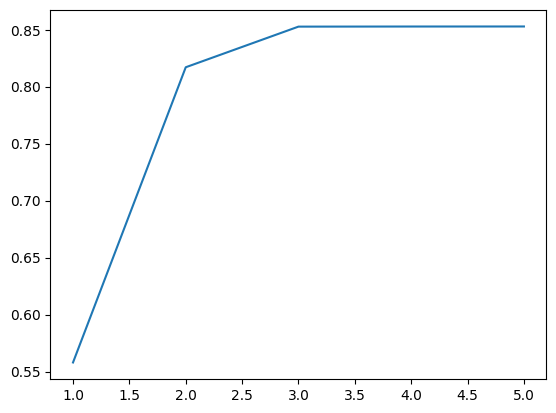

In [9]:
# Pick best-performing subset for each subset length and plot the optimal score wrt the number of features
parameter_length={3:[0],6:[0],9:[0],12:[0],15:[0]}
for i in results.items():
    parameter_length[len(i[0])].append(i[1])

# print(parameter_length)

for i in parameter_length.keys():
    parameter_length[i]=max(parameter_length[i])

print(parameter_length)
plt.plot([i/3 for i in parameter_length.keys()],parameter_length.values())
final={}
for key, value in parameter_length.items():
    final[value]=list(results.keys())[list(results.values()).index(value)]
print(final)

## Results

In [10]:
optimal_subsets=[[3],[3,4],[0,3,4],[0,2,3,4],[0,1,2,3,4]]



Subset: [3] 
Validation r2 score: 0.55799
MSE: 6.636133200476984e-05
AIC for Linear Regression: -17312.712836789964
BIC for Linear Regression: -17301.721752902195 



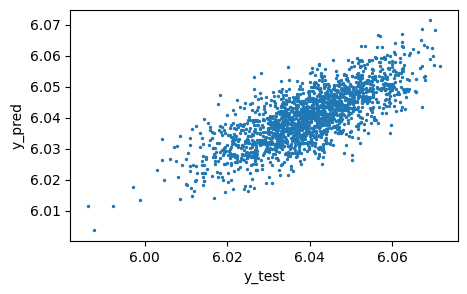



Subset: [3, 4] 
Validation r2 score: 0.81703
MSE: 2.747057565234291e-05
AIC for Linear Regression: -18898.31118432622
BIC for Linear Regression: -18881.824558494565 



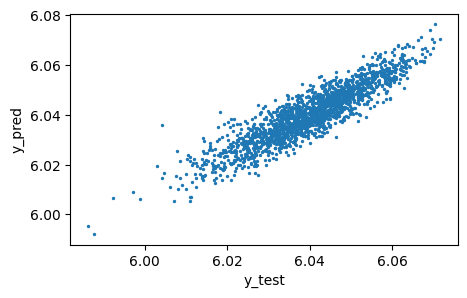



Subset: [0, 3, 4] 
Validation r2 score: 0.85268
MSE: 2.211766566570794e-05
AIC for Linear Regression: -19286.44105125203
BIC for Linear Regression: -19264.458883476495 



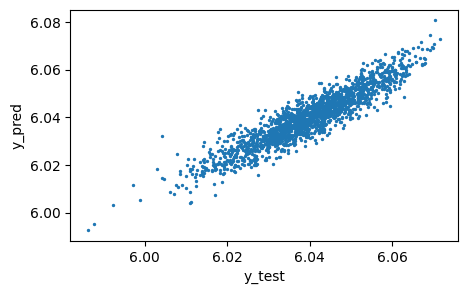



Subset: [0, 2, 3, 4] 
Validation r2 score: 0.85272
MSE: 2.2111814423110015e-05
AIC for Linear Regression: -19284.917305402727
BIC for Linear Regression: -19257.439595683307 



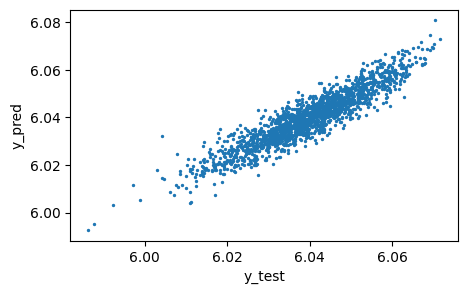



Subset: [0, 1, 2, 3, 4] 
Validation r2 score: 0.85281
MSE: 2.2098839713316117e-05
AIC for Linear Regression: -19283.973814461715
BIC for Linear Regression: -19251.00056279841 



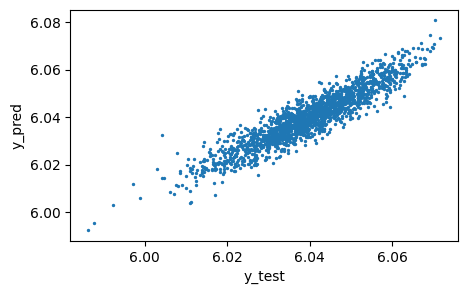

In [22]:
optimal_subsets=[[3],[3,4],[0,3,4],[0,2,3,4],[0,1,2,3,4]]
for subset in optimal_subsets:
    features = df.iloc[:, subset]   # All columns except the last
    target = df.iloc[:, -1]  # Last column
    
    # Define the linear regression model
    model = LinearRegression()
    
    # Test-Train-Validation Split (replace test_size with your desired split ratio)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
    
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Evaluate the model performance on the validation data (e.g., using mean squared error)
    predictions_val = model.predict(X_test)
    r2 = r2_score(y_test, predictions_val)
    print('\n\n\033[1mSubset:', subset, '\033[0m')
    print("Validation r2 score:", round(r2,5))
    n_features = len(model.coef_) + 1
    
    mse= mean_squared_error(y_test, predictions_val) 
    
    # Calculate AIC (assuming you have the number of observations in y)
    n_obs = len(y_test)
    aic = math.log(mse) * n_obs + 2 * n_features
    bic = n_obs * math.log(mse) + n_features * math.log(n_obs)
    print('MSE:', mse)
    print("AIC for Linear Regression:", aic)
    print("BIC for Linear Regression:", bic,'\n')
    
    fig, ax = plt.subplots()
    fig.set_figwidth(5)
    fig.set_figheight(3)
    plt.scatter(y_test, predictions_val,s=2)
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()

# Lasso Regression


## Process

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import pandas as pd
import math
results={}
for array in combinations:
    # Separate features and target variable
    features = df.iloc[:, array]  # All columns except the last
    target = df.iloc[:, -1]  # Last column
    
    # Define the linear regression model
    # model = Lasso()|
    model = Lasso(alpha=0.00001)
    # Test-Train-Validation Split (replace test_size with your desired split ratio)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Evaluate the model performance on the validation data (e.g., using mean squared error)
    predictions_val = model.predict(X_test)
    r2 = r2_score(y_test, predictions_val)
    print(array,"Validation r2 score:", r2)
    results[f'{array}']=round(r2,5)


[0] Validation r2 score: -0.0008361697992667061
[1] Validation r2 score: 0.006385226044508863
[2] Validation r2 score: 0.0012800311311317314
[3] Validation r2 score: 0.5504431493894013
[4] Validation r2 score: 0.2760136030007445
[0, 1] Validation r2 score: 0.006385226044508863
[0, 2] Validation r2 score: 0.0012800311311317314
[0, 3] Validation r2 score: 0.5504431493894013
[0, 4] Validation r2 score: 0.2760136030007445
[1, 2] Validation r2 score: 0.008690426248349481
[1, 3] Validation r2 score: 0.5530882500654679
[1, 4] Validation r2 score: 0.27765565929445934
[2, 3] Validation r2 score: 0.5510499529622928
[2, 4] Validation r2 score: 0.27689307214836845
[3, 4] Validation r2 score: 0.8121240559912792
[0, 1, 2] Validation r2 score: 0.008690426248349481
[0, 1, 3] Validation r2 score: 0.5530882500654679
[0, 1, 4] Validation r2 score: 0.27765565929445934
[0, 2, 3] Validation r2 score: 0.5510499529622928
[0, 2, 4] Validation r2 score: 0.27689307214836845
[0, 3, 4] Validation r2 score: 0.81212

{3: 0.55044, 6: 0.81212, 9: 0.81229, 12: 0.81232, 15: 0.81232}
{0.55044: '[3]', 0.81212: '[3, 4]', 0.81229: '[2, 3, 4]', 0.81232: '[1, 2, 3, 4]'}


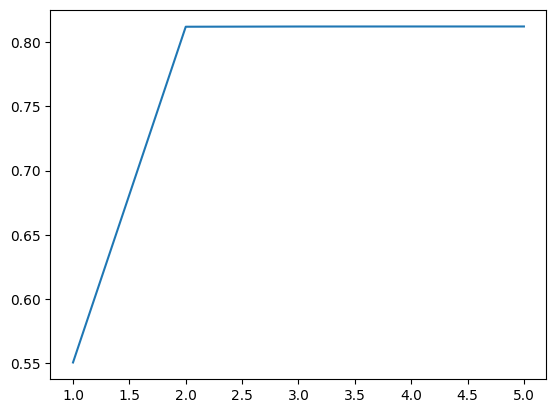

In [13]:
parameter_length={3:[0],6:[0],9:[0],12:[0],15:[0]}
for i in results.items():
    parameter_length[len(i[0])].append(i[1])
# print(parameter_length)
for i in parameter_length.keys():
    parameter_length[i]=max(parameter_length[i])
print(parameter_length)

plt.plot([i/3 for i in parameter_length.keys()],parameter_length.values())

final={}
for key, value in parameter_length.items():
    final[value]=list(results.keys())[list(results.values()).index(value)]
# print(results)
print(final)

## Results

In [14]:
optimal_subsets=[[3],[3,4],[2,3,4],[1,2,3,4],[0,1,2,3,4]]



Subset:  [3] 
Validation r2 score: 0.55044
MSE: 6.749453465162273e-05
AIC for Linear Regression: -17282.23507667839
BIC for Linear Regression: -17271.24399279062 



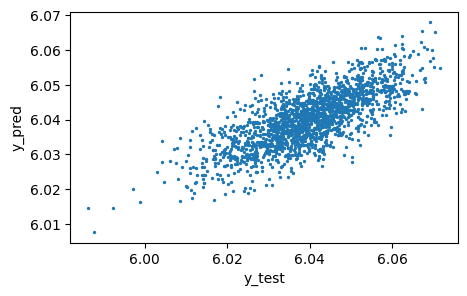



Subset:  [3, 4] 
Validation r2 score: 0.81212
MSE: 2.8206887284399847e-05
AIC for Linear Regression: -18850.69988381321
BIC for Linear Regression: -18834.213257981555 



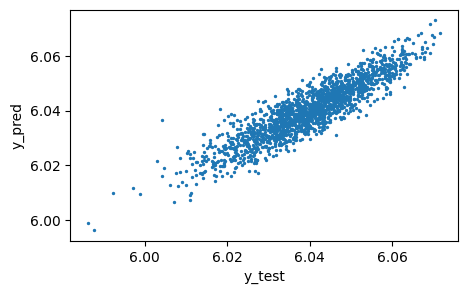



Subset:  [0, 3, 4] 
Validation r2 score: 0.81212
MSE: 2.8206887284399847e-05
AIC for Linear Regression: -18848.69988381321
BIC for Linear Regression: -18826.717716037674 



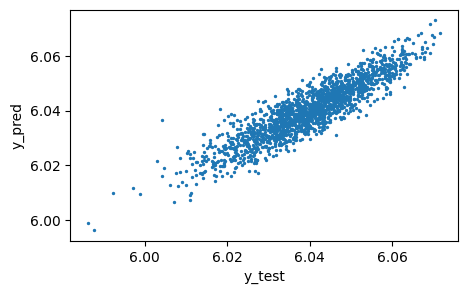



Subset:  [0, 2, 3, 4] 
Validation r2 score: 0.81229
MSE: 2.818128794877259e-05
AIC for Linear Regression: -18848.334226726565
BIC for Linear Regression: -18820.856517007145 



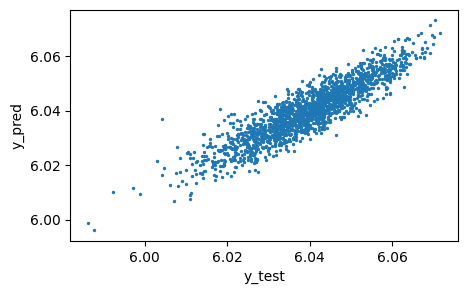



Subset:  [0, 1, 2, 3, 4] 
Validation r2 score: 0.81232
MSE: 2.8177237588269254e-05
AIC for Linear Regression: -18846.592950632097
BIC for Linear Regression: -18813.619698968792 



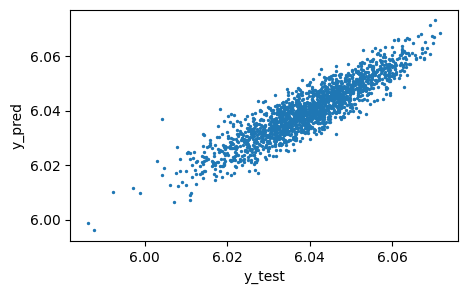

In [24]:
for subset in optimal_subsets:
    features = df.iloc[:, subset]  # All columns except the last
    target = df.iloc[:, -1]  # Last column
    
    # Define the linear regression model
    model = Lasso(alpha=0.00001)
    
    # Test-Train-Validation Split (replace test_size with your desired split ratio)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
    
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Evaluate the model performance on the validation data (e.g., using mean squared error)
    predictions_val = model.predict(X_test)
    r2 = r2_score(y_test, predictions_val)
    print('\n\n\033[1mSubset: ',subset,'\033[0m')
    print("Validation r2 score:", round(r2,5))
    n_features = len(model.coef_) + 1
    
    mse= mean_squared_error(y_test, predictions_val) 
    
    # Calculate AIC (assuming you have the number of observations in y)
    n_obs = len(y_test)
    aic = math.log(mse) * n_obs + 2 * n_features
    bic = n_obs * math.log(mse) + n_features * math.log(n_obs)
    print('MSE:', mse)
    print("AIC for Linear Regression:", aic)
    print("BIC for Linear Regression:", bic,'\n')
    
    fig, ax = plt.subplots()
    fig.set_figwidth(5)
    fig.set_figheight(3)
    plt.scatter(y_test, predictions_val,s=2)
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()

# PCA

## Process

Explained Variance Ratio: [5.32317579e-01 4.67410943e-01 2.67254327e-04 4.22358880e-06
 1.62490958e-11]


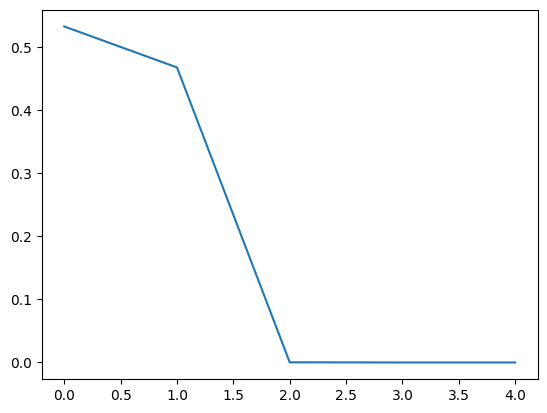

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  # Optional for standardization

# Standardize the data (optional, but recommended for PCA)
  # Apply scaling to the features

# Define the number of principal components (experiment with different values)
features = df.iloc[:, :-1]  # All columns except the last
target = df.iloc[:, -1]  # Last column
    
n_components = 5  # You can choose a different number based on your needs
# Create the PCA object
pca = PCA(n_components=n_components)

# Fit PCA to the data (scaled or non-scaled)
pca.fit(features)  # Use features_scaled if standardization is applied

# Get the transformed data (i.e., principal components)
principal_components = pca.transform(features)  # Use features_scaled if standardization is applied

# Print the explained variance ratio per component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.plot(pca.explained_variance_ratio_)


In [17]:
eigenvectors = pca.components_

print("Eigenvectors (Principal Components):")
print(eigenvectors)

Eigenvectors (Principal Components):
[[-2.70502151e-06 -9.99999110e-01 -6.83631187e-04  1.18535818e-04
  -1.13959855e-03]
 [ 1.00531580e-06 -6.84851152e-04  9.99999197e-01 -5.65959487e-05
   1.06458000e-03]
 [ 1.66140748e-04  1.13887231e-03  1.06536073e-03  2.46007835e-05
  -9.99998770e-01]
 [ 2.37275641e-02 -1.18504240e-04 -5.66628779e-05 -9.99718453e-01
  -2.08470952e-05]
 [-9.99718448e-01  8.17497714e-08 -1.60353163e-07 -2.37275606e-02
  -1.66677970e-04]]


In [18]:
def project_df(df_A, df_B, n):
    array_A = df_A
    # print(df_A.shape)
    array_B = df_B[:n,:].T
    # print(array_B.shape)
    
    # Perform matrix multiplication using NumPy
    result = np.matmul(array_A, array_B)
    
    # Convert the result back to a DataFrame (optional)
    df_result = pd.DataFrame(result)
    return df_result
    

## Results



Number_of_components 1 
Validation r2 score: 0.006407786014888672
Validation mse score: 0.0001491736674133992
AIC for Linear Regression: -52858.3962658306
BIC for Linear Regression: -52844.99723633418


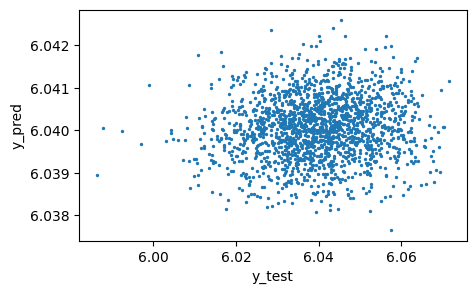



Number_of_components 2 
Validation r2 score: 0.008711310513601411
Validation mse score: 0.0001488278261390686
AIC for Linear Regression: -52870.32269655304
BIC for Linear Regression: -52850.22415230841


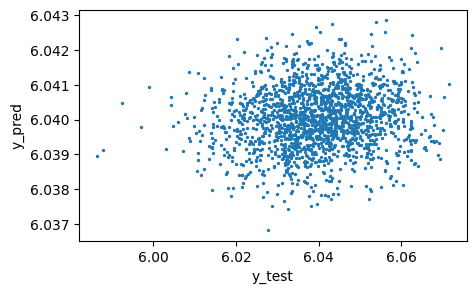



Number_of_components 3 
Validation r2 score: 0.2786910542562173
Validation mse score: 0.00010829422700800775
AIC for Linear Regression: -54775.95226562009
BIC for Linear Regression: -54749.15420662725


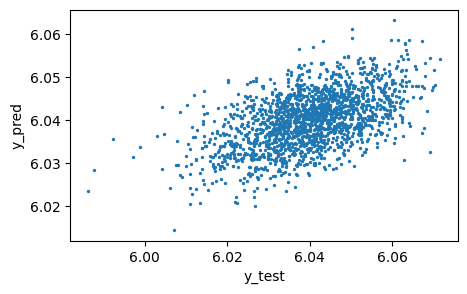



Number_of_components 4 
Validation r2 score: 0.8171946583171511
Validation mse score: 2.7445608830021218e-05
AIC for Linear Regression: -63009.826235406166
BIC for Linear Regression: -62976.32866166512


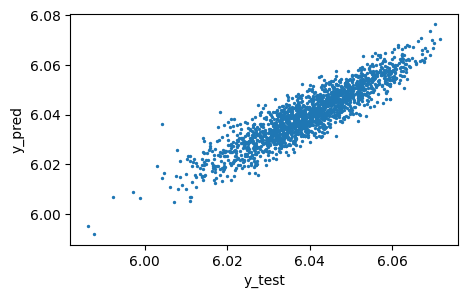



Number_of_components 5 
Validation r2 score: 0.8528075667913676
Validation mse score: 2.209883971329362e-05
AIC for Linear Regression: -64307.9127148785
BIC for Linear Regression: -64267.71562638924


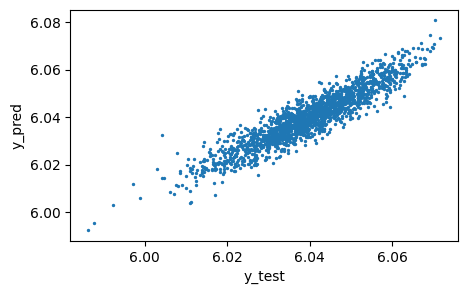

In [19]:
import numpy as np
from sklearn.metrics import r2_score
for number_of_components in range(1,6):
    model = LinearRegression()
    
    # Test-Train-Validation Split (replace test_size with your desired split ratio)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
    
    X_test=project_df(X_test, eigenvectors, number_of_components)
    X_train=project_df(X_train, eigenvectors, number_of_components)
    
    # Train the model on the training data
    model.fit(X_train, y_train)
    
    # Evaluate the model performance on the validation data (e.g., using mean squared error)
    predictions_val = model.predict(X_test)
    mse_val = mean_squared_error(y_test, predictions_val)
    r2=r2_score(y_test, predictions_val)
    # print(r2)
    print('\n\n\033[1mNumber_of_components',number_of_components,'\033[0m')
    print("Validation r2 score:", r2)
    results[f'{number_of_components}']=mse_val
 
    from sklearn.metrics import mean_squared_error 

    mse= mean_squared_error(y_test, predictions_val) 
    print("Validation mse score:", mse)
    n_features = len(model.coef_) + 1
    
    # Calculate AIC (assuming you have the number of observations in y)
    n_obs = len(target)
    aic = math.log(mse) * n_obs + 2 * n_features
    bic = n_obs * math.log(mse) + n_features * math.log(n_obs)
    print("AIC for Linear Regression:", aic)
    print("BIC for Linear Regression:", bic)
    fig, ax = plt.subplots()
    fig.set_figwidth(5)
    fig.set_figheight(3)
    plt.scatter(y_test, predictions_val,s=2)
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()
    

# Residuals and Auto-Correlation

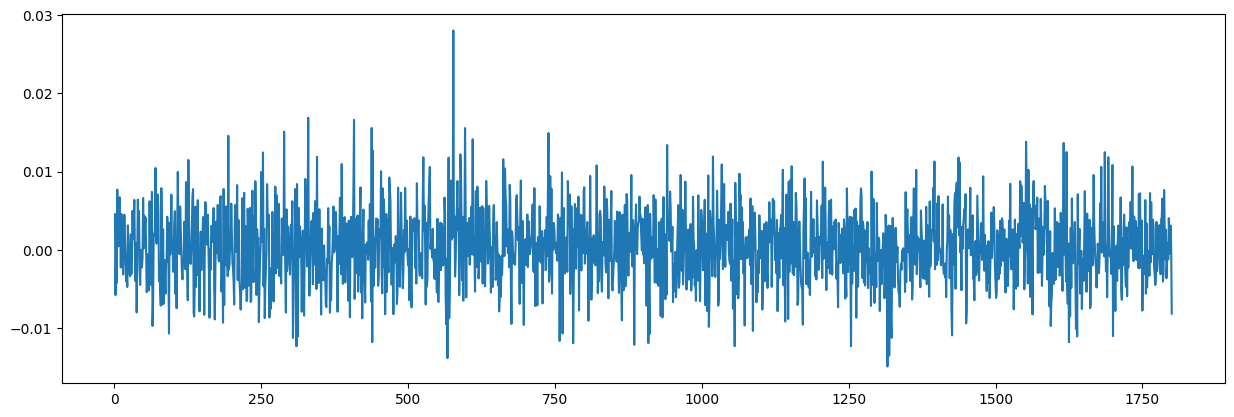

In [20]:
fig, ax = plt.subplots()

# Set desired width and height in inches
fig.set_figwidth(15)
residuals=predictions_val-y_test
plt.plot([i for i in range(1, len(y_test)+1)],predictions_val-y_test)

In [21]:
lag=1
correlation_matrix = np.corrcoef(residuals[:-lag], residuals[lag:])
correlation = correlation_matrix[0, 1]  # Accessing the top-left element

print("Correlation coefficient:", correlation)

Correlation coefficient: 0.012660056072405224
